# **Machine learning Project**
By **Thomas Marchal** #20220714, **Louis Hislaire** #  and **Jules Rougier** #20220748 


## **Data Selection**

We decided to choose the dataset related with the **data housing** as it it a large dataset and easy to imagine the possible applications in real life.

## **Scenario**

In this project, we chose to study a dataset about housing data. That includes numerical informations about the house (size, age, rooms, etc...) and categorical ones, General information such as if the house is waterfront and of course the price of the house.
Using this information we can guess a few possible scenarios and choose one to study for the project.
 

### Explanation:
The target variable in this dataset is most likely **price**, which is a continuous numeric value. Since regression is used to predict continuous values, this points to a **regression problem**.

However, clustering could also be relevant if the goal is to group similar properties together based on features such as sqft_living, bedrooms, and bathrooms, without focusing directly on predicting price. In that case, clustering would aim to identify groups or clusters of similar houses based on these characteristics.

### Conclusion:
The project could tackle a regression problem if the goal is to predict price, or a clustering problem if the goal is to group similar properties based on their features. In this project, we will be **focusing on price estimation using regression techniques.**


## **Data Loading**
To load our House data, we need to load the required **python librairies**. We will use pandas in order to read our csv file. 

In [41]:
# Load required librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

Now, the librairies are imported and we can **open our file** using the **read_csv** function.

In [28]:
#Load the data
df = pd.read_csv("data/House_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We can now **manage** our data and **apply some changes** to it !

## **Data Wrangling or Data Pre-processing**

We will make the **pre-processing** of the data in order to be used properly in our different models.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We saw with the info function here that there are missing values in the bedrooms and bathrooms data.

We will use a module from Sklearn named SimpleImputer, that can fill missing data using a strategy. We will here use the mean strategy which will fill the missing data with the mean of the available data.

We have numerical values for all the values despite for the date.

For the numerical values, we will use a module given by the Sklearn library to scale the data by removing the mean and scaling to unit variance.

For the categorical date, we will also use a module of Sklearn, OrdinalEncoder, that encodes categorical features as an array of integers.

In [30]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("ordinal", OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_features),
        ("cat", categorical_pipeline, categorical_features)
    ],
    remainder="passthrough"
)

processed_data = preprocessor.fit_transform(df)

encoded_cat_cols = preprocessor.named_transformers_["cat"]["ordinal"].get_feature_names_out(categorical_features)
all_columns = list(numerical_features) + list(encoded_cat_cols)

# Convertir en DataFrame avec les noms originaux
processed_df = pd.DataFrame(processed_data, columns=all_columns)

processed_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,0.886146,-0.866717,-0.402513,-1.451270,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,...,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715,164.0
1,0.637511,-0.005688,-0.402513,0.174641,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,...,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868,220.0
2,0.365444,-0.980849,-1.482011,-1.451270,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,...,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375,290.0
3,-0.727656,0.174090,0.676985,1.150187,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,...,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522,220.0
4,-0.912881,-0.081958,-0.402513,-0.150541,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,...,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849,283.0


In [31]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  float64
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  float64
 5   sqft_lot       21613 non-null  float64
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  float64
 8   view           21613 non-null  float64
 9   condition      21613 non-null  float64
 10  grade          21613 non-null  float64
 11  sqft_above     21613 non-null  float64
 12  sqft_basement  21613 non-null  float64
 13  yr_built       21613 non-null  float64
 14  yr_renovated   21613 non-null  float64
 15  zipcode        21613 non-null  float64
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

The data is **ready** for our models !

## **Exploratory Data Analysis**

### Summary statistics for numerical features
For each feature we can **compute** the mean, standart derivation, the minimum ect...

In [32]:
numerical_summary = df[numerical_features].describe()
numerical_summary

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Features Distribution
**Distribution plots** for numerical features

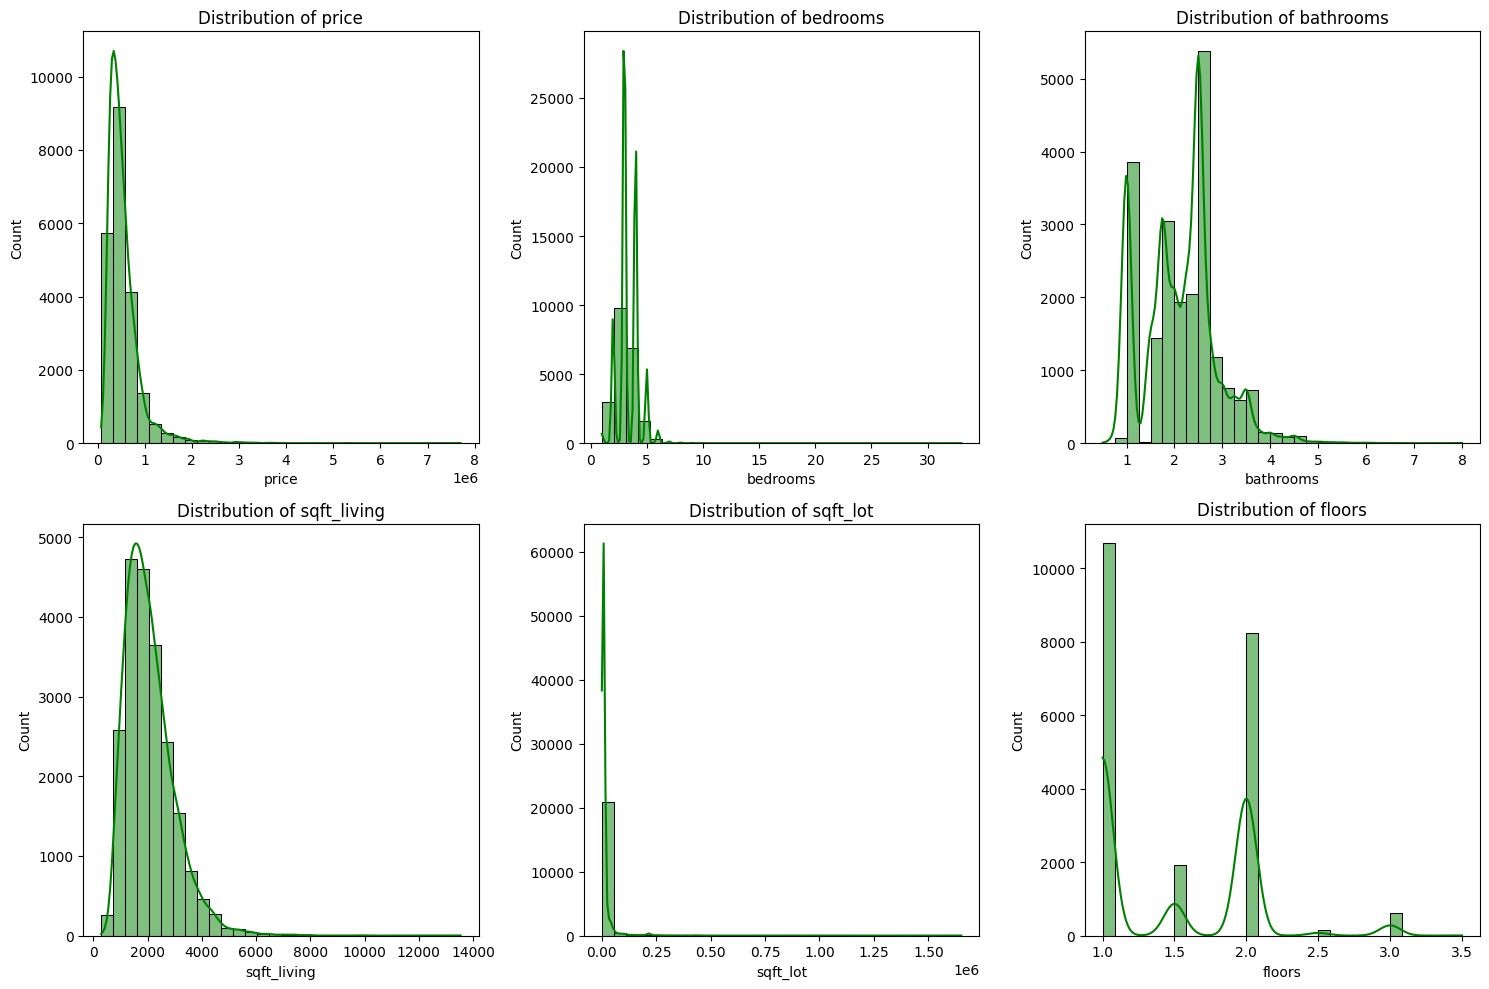

In [33]:
#Remove the 'id' column which is useless to compute it's distribution
numerical_features_no_id = numerical_features.drop("id")


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_no_id[:6], start=1): 
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

The **data distribution** of this dataset is **not too large**, it will be **benefit** for our model.

### Explore Relationships Between Variables
We used the **correlation heatmaps** to identify potential **strong relationships** between variables

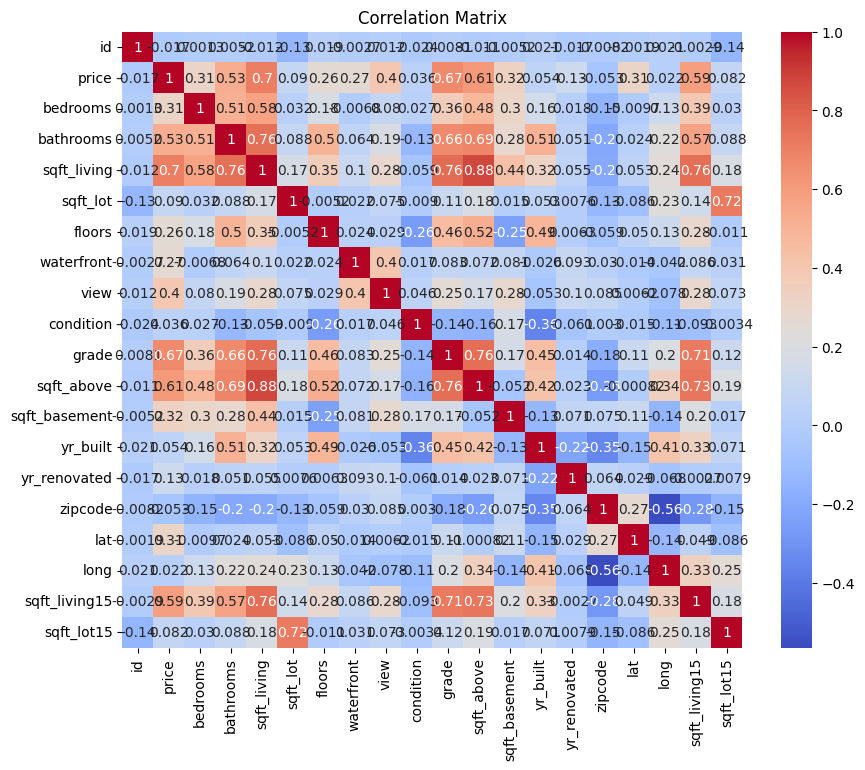

In [34]:
corr_matrix = processed_df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

We applied differents techniques of data exploration so we could understand our data set and we were able to understand **the relevant features.**
<br><br>
Some features are **highly correlated**, so we could **simplify** our dataset by removing or merging some features. Here, sqft_above is higly correlated (0.88) with sqft_living so the features are redundant for our model and could be simplified. We will drop the feature with a score higher than 0.8, here sqrt_above only.

In [35]:
# Drop the 'sqft_above' feature from the dataset as it is highly correlated with 'sqft_living'
df_reduced = processed_df.drop(columns=["sqft_above"])

numerical_features_reduced = numerical_features.drop("sqft_above")

df_reduced.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,0.886146,-0.866717,-0.402513,-1.451270,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715,164.0
1,0.637511,-0.005688,-0.402513,0.174641,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868,220.0
2,0.365444,-0.980849,-1.482011,-1.451270,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375,290.0
3,-0.727656,0.174090,0.676985,1.150187,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522,220.0
4,-0.912881,-0.081958,-0.402513,-0.150541,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849,283.0


We can know apply our **machine learning algorithms !**

## **Model Developement** (Apply ML algorithms)

### **KNN Regression**

**KNN Regression** (K-Nearest Neighbors Regression) is a simple machine learning algorithm used for predicting continuous values. It works by identifying the Knnearest data points (neighbors) to a given point and estimating the target value as the average of their values.

Advantages:

    - Simplicity: Easy to understand and implement.
    - Non-parametric: Makes no assumptions about data distribution.
    - Versatility: Can model complex relationships in data.

In [36]:
# Drop irrelevant columns and separate the features and target
X = processed_df.drop(columns=["price", "id", "date"])
y = processed_df["price"]

# Encode non-numerical features
X = pd.get_dummies(X, drop_first=True)

# Check missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Regressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate 
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.25356260681023696
Mean Squared Error: 0.24634707535716796


### Visualize our Model

We could **visualize** the price predicted from the actual one using a **graph**. Same for the **MAE and MSE erros**. This will be useful to **compare** from the other models. 

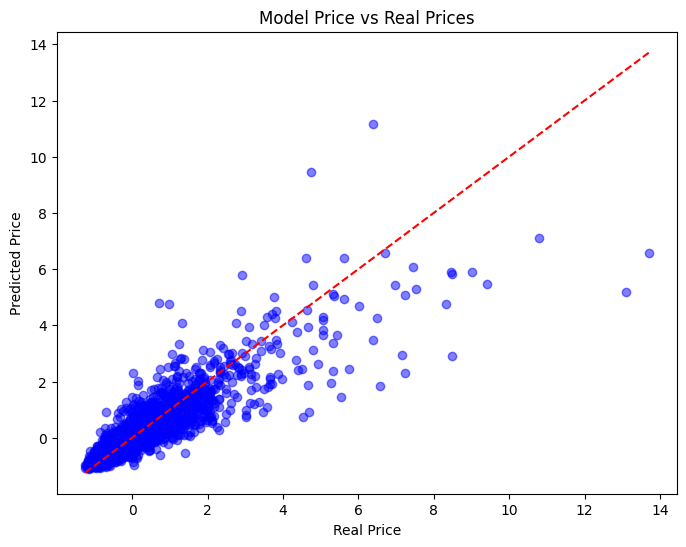

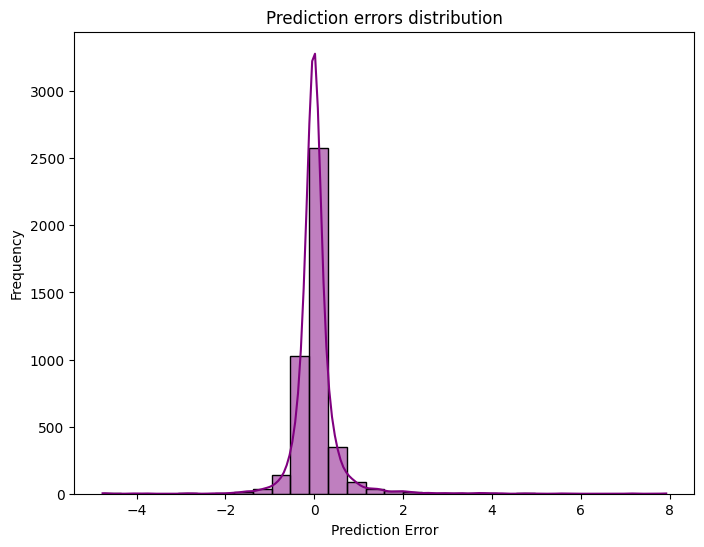

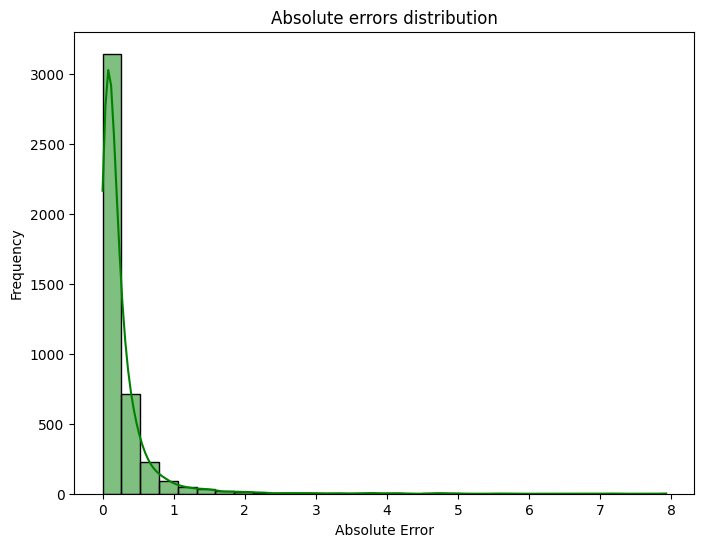

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Model Price vs Real Prices')
plt.show()

errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='purple', bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction errors distribution')
plt.show()

abs_errors = np.abs(errors)
plt.figure(figsize=(8, 6))
sns.histplot(abs_errors, kde=True, color='green', bins=30)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Absolute errors distribution')
plt.show()

### **Random Forest Regressor Model**

#### Basic Concept

The model consists of a "forest" of **decision trees**, which are hierarchical structures that split data into branches based on conditions. For example, a node in the tree might split data on an "age" feature into two branches: *< 60 years* and *≥ 60 years*.

Each decision tree attempts to predict the target variable (in this case, house prices) by recursively splitting the data based on the feature that best explains the target at each step. For regression problems, trees aim to minimize the **variance** within each split.

#### Why do we use a forest instead of a single tree?

A single decision tree can be effective but is prone to **overfitting**, meaning it might fit the training data too closely and perform poorly on new, unseen data. Each tree is trained on a random subset of the data and the final prediction is typically the average of the predictions from all trees, making the model more stable and robust.

#### In our case

For predicting house prices, each tree in the forest is trained on random subsets of the training data to learn the relationships between the features of a house (e.g., size, age, number of rooms) and its price. Once the trees are trained, the Random Forest combines their predictions (by averaging) to produce a final estimate of the house price. This approach ensures more reliable and accurate predictions compared to a single decision tree.

In [38]:
X = processed_df.drop('price', axis=1)
y = processed_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.19810681420459417
Mean Squared Error: 0.16597774359269435


### Visualize our Model

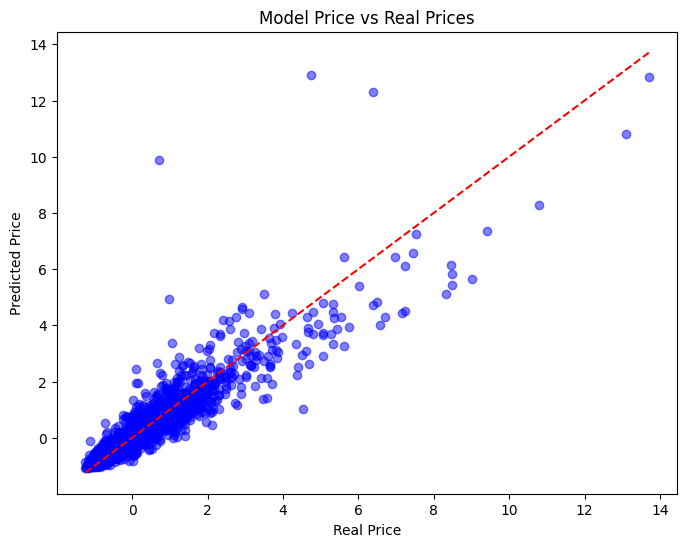

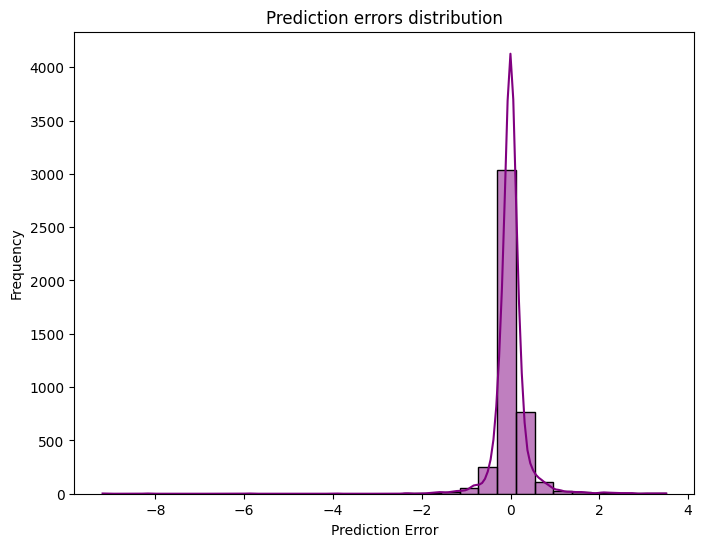

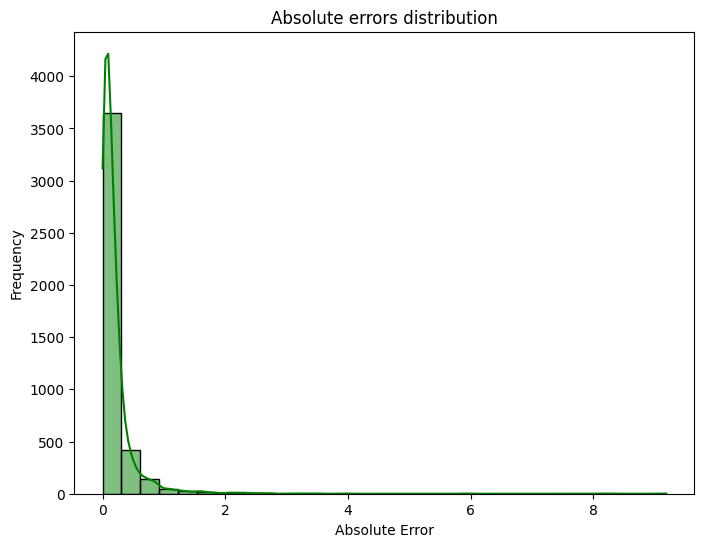

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Model Price vs Real Prices')
plt.show()

errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='purple', bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction errors distribution')
plt.show()

abs_errors = np.abs(errors)
plt.figure(figsize=(8, 6))
sns.histplot(abs_errors, kde=True, color='green', bins=30)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Absolute errors distribution')
plt.show()

### **Elastic Net Regression**

#### **Basic Concept**

Elastic Net Regression is a linear regression model that combines the benefits of **Lasso Regression** (L1 regularization) and **Ridge Regression** (L2 regularization). It works by penalizing the coefficients of the features to prevent overfitting, using both L1 and L2 penalties. The L1 penalty tends to drive some coefficients to zero (performing feature selection), while the L2 penalty encourages smaller coefficients overall, helping the model generalize better.

The model tries to minimize the residual sum of squares while also applying regularization. By combining these two regularization techniques, Elastic Net can handle situations where there are many correlated features, which can be problematic for Lasso or Ridge individually.

#### **Why do we use Elastic Net instead of just Lasso or Ridge?**

Elastic Net is particularly useful when:
- There are **many correlated features**. Lasso may arbitrarily select one of the correlated features and ignore others, while Ridge tends to shrink all coefficients, but doesn’t perform feature selection. Elastic Net does both, making it better suited for data with correlations among predictors.
- A **balance between Lasso and Ridge** is needed. If Lasso doesn’t perform well due to collinearity, Elastic Net can provide better predictions by mixing both L1 and L2 regularization.

#### **In our case**

For predicting house prices, Elastic Net helps capture the relationships between various features of the house (such as square footage, number of bedrooms, and age) and its price. The model applies both L1 and L2 penalties to the coefficients of these features. By doing so, it performs feature selection (eliminating irrelevant features) while also avoiding overfitting, especially in the presence of correlated predictors like `sqft_living` and `sqft_above`.

Elastic Net allows us to fine-tune the balance between Lasso and Ridge, ensuring that the model not only fits the data well but also generalizes effectively to unseen data, providing more reliable and accurate price predictions compared to using just Lasso or Ridge.


Mean Squared Error (MSE): 0.37
R² Score: 0.67


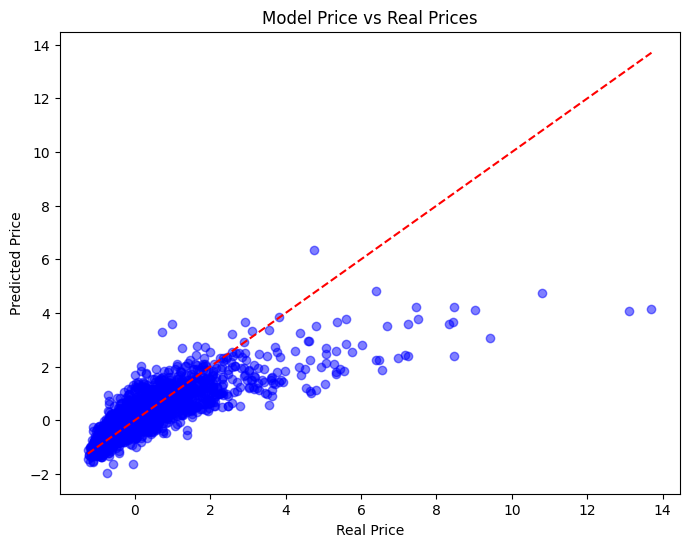

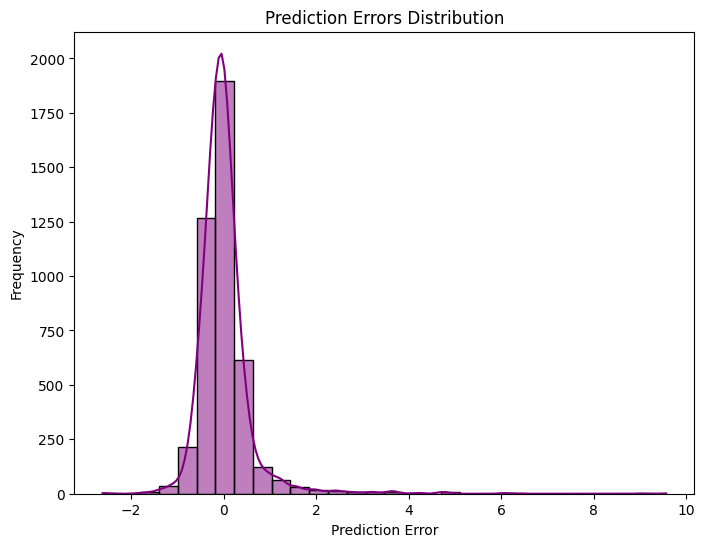

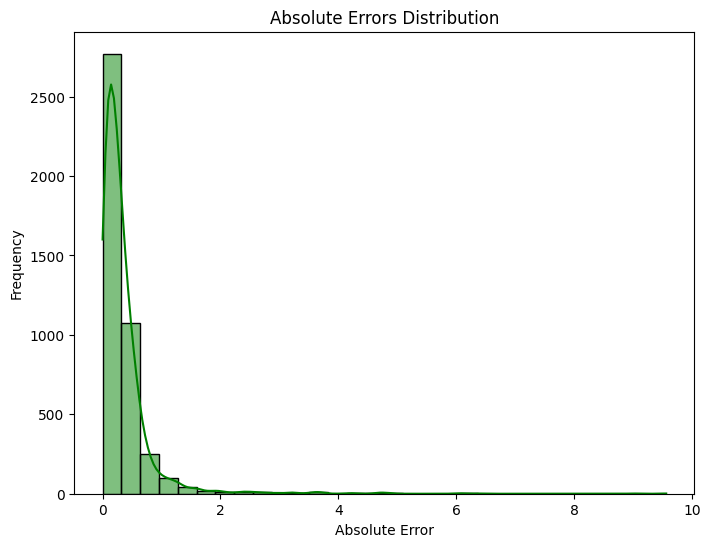

In [42]:
from sklearn.linear_model import ElasticNet

X = processed_df.drop("price", axis=1)  # Features
y = processed_df["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization: Real vs Predicted Prices
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Model Price vs Real Prices')
plt.show()

# Visualization: Prediction Errors Distribution
errors = y_test - y_pred
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='purple', bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Errors Distribution')
plt.show()

# Visualization: Absolute Errors Distribution
abs_errors = np.abs(errors)
plt.figure(figsize=(8, 6))
sns.histplot(abs_errors, kde=True, color='green', bins=30)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Absolute Errors Distribution')
plt.show()


### **Comparative Analysis of Machine Learning Models for House Price Prediction**

#### **Overview of Models Used**
To predict house prices, we utilized three different machine learning algorithms:
1. **KNN Regression**  
2. **Random Forest Regressor**  
3. **ElasticNet Model**  

After evaluating these three models, we can draw several conclusions about their performance and suitability for the task.

---
### **Comparison of Performance Metrics for KNN, Random Forest, and Elastic Net Models**

| Metric                     | KNN          | Random Forest | Elastic Net   |
|----------------------------|--------------|---------------|---------------|
| **Mean Absolute Error (MAE)** | 0.254        | 0.198         | 0.347         |
| **Mean Squared Error (MSE)**  | 0.246        | 0.166         | 0.375         |
| **Root Mean Squared Error (RMSE)** | 0.496   | 0.407         | 0.612         |
| **R-squared (R²)**           | 0.780        | 0.852         | 0.666         |
| **Adjusted R-squared**       | 0.779        | 0.851         | 0.664         |

#### **Insights**
- **Random Forest** shows the best performance across all metrics, with the lowest error values and the highest R² and Adjusted R², making it the most suitable model.
- **KNN** performs moderately well but struggles slightly with high-price predictions, reflected in higher error metrics compared to Random Forest.
- **Elastic Net** performs the worst, indicating its limitations in capturing non-linear relationships in the data, as evidenced by the highest error values and the lowest R² and Adjusted R².

---

#### **KNN Regression**
The **KNN Regression** algorithm was the first model studied, as it is a simpler yet effective model for capturing **complex relationships**. While KNN performs **reliably for lower-priced houses**, it has a noticeable tendency to **undervalue higher-priced properties**, which reveals a significant limitation in the model's performance.

---

#### **ElasticNet Model**
The **ElasticNet** model produced the **largest Mean Squared Error (MSE)** among the three models. This outcome is likely because ElasticNet is fundamentally a linear model and may fail to capture the importance of **non-linear relationships** present in the dataset. Due to its poor performance, it is the **least likely model to be used** for predicting house prices in this scenario.

---

#### **Random Forest Regressor**
The **Random Forest Regression** model, based on decision trees, delivered the **lowest MSE** in our study. This model:
- Demonstrated **high precision for lower-priced houses**.
- Produced **relatively accurate estimates for higher-priced properties**, addressing one of the key shortcomings of KNN.

Additionally, Random Forest proved to be computationally efficient, taking approximately **&_ seconds** to analyze 26,000 houses in the dataset. This balance of **accuracy** and **speed** makes it the **most promising model** for future use in predicting house prices.

---

#### **Conclusion**
Based on the analysis, we will be using the Random Forest Regressor algorithm for future uses of a house price estimator. In addition to being the most precise it hold the possibility to increase precision (also increasing duration of calculations) by adding more trees in our forest. As of now we are using 100 trees but we could use 200 or even 1000 or more trees if we are not limited by time or processing power.